In [2]:
import os
import numpy as np
from IPython.display import HTML
from PreProcessing_af import (parse_observations_af)
from PreProcessing_af import sonnet_parser_af

from HMM import unsupervised_HMM
from HMM_helper import (
    text_to_wordcloud,
    states_to_wordclouds,
    sample_sentence,
    visualize_sparsities,
    parse_observations,
    animate_emission, 
    obs_map_reverser
)

In [3]:
# using HMM implementation from HW 6

### Data Processing Notes 
* lowercase all words
* split lines into lists (singular sequence as a line in the poem)
* remove / ignore punctuation 
* 

* try entire sonnet as a sequence. 

In [4]:
text = open(os.path.join(os.getcwd(), 'data/shakespeare.txt')).read()

In [5]:
# using Alex's parser, turns sonnets into sequences and eliminates sonnet numbers
obs_sonnet, obs_map_sonnet = sonnet_parser_af(text)

In [14]:
obs = obs_sonnet
obs_map = obs_map_sonnet

In [15]:
# # read in (but includes numbers)
# obs, obs_map = parse_observations(text)

In [16]:
# # read in text, excluding sonnet numbers from obs and obs map
# obs, obs_map = parse_observations_af(text)

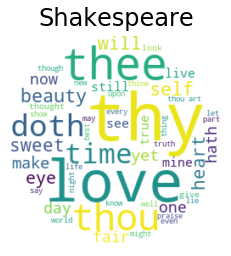

In [17]:
wordcloud = text_to_wordcloud(text, title='Shakespeare')

In [18]:
# 10 states, 100 iterations 

In [19]:
# hmm10 = unsupervised_HMM(obs, 10, 1)

In [20]:
# print('Sample Sentence:\n====================')
# print(sample_sentence(hmm10, obs_map, n_words=25))

In [21]:
# print sample poem 

In [22]:
# trying again moving sonnet update line up

# works if numbers not removed 
# turn lines = sequences -> sonnet=sequeces 

sonnets = [] # initialize list for containing all sonnet sequences
current_sonnet = [] 

for line in obs:
    if len(line)==1: # beginning of a sonnet (number)
        sonnets.append(current_sonnet)
        sonnets.append(line) # new obs for each number (to match obs map)
        current_sonnet = [] # initialize new empty list for new sonnet sequence
        pass
    
    elif len(line)!=1:
        current_sonnet.extend(line) # add new line to sonnet
#     sonnets.append(current_sonnet) # add previous sonnet to list of all sonnet sequences
     
sonnets = sonnets[1:]

In [23]:
def turn_obs_sonnets_w_num(obs):
    sonnets = [] # initialize list for containing all sonnet sequences
    current_sonnet = [] 

    for line in obs:
        if len(line)==1: # beginning of a sonnet (number)
            sonnets.append(current_sonnet)
            sonnets.append(line) # new obs for each number (to match obs map)
            current_sonnet = [] # initialize new empty list for new sonnet sequence
            pass

        elif len(line)!=1:
            current_sonnet.extend(line) # add new line to sonnet

    sonnets = sonnets[1:]
    return sonnets

In [24]:
# # if numbers removed 

# sonnets = [] # initialize list for containing all sonnet sequences
# current_sonnet = [] 
# counter = 0 

# for line in obs:
#     if counter<14:
#         current_sonnet.extend(line) # add new line to sonnet
#         counter += 1
#     elif counter==14:
#         sonnets.append(current_sonnet) # add previous sonnet to list of all sonnet sequences
#         counter=0 # reset counter
#         current_sonnet=[]
#         current_sonnet.extend(line)
        

In [28]:
#print('Sample Sentence:\n====================')
#print(sample_sentence(hmm11, obs_map, n_words=25))

In [29]:
# mean number of words/ sonnet 

mean_word_array = np.full(len(sonnets), np.nan)
for i in range(len(sonnets)):
    mean_word_array[i] = len(sonnets[i])
    
print(np.mean(mean_word_array))

nan


Make each sonnet 108 divided by 14 lines

In [30]:
def sample_sonnet(hmm, obs_map, n_words=112):
    # Get reverse map.
    obs_map_r = obs_map_reverser(obs_map)

    
    emission, states = hmm.generate_emission(n_words)
    
    line_iter = [0, 8, 16, 24, 32, 40, 48, 56, 64, 72, 80, 88, 96, 104, 112]
    
    for i in range(len(line_iter[:-1])):
        
        stanza_num = emission[line_iter[i]:line_iter[i+1]]
        stanza_word = [obs_map_r[k] for k in stanza_num]
        print(' '.join(stanza_word))
    


#     return ' '.join(sentence).capitalize() + '...'

In [31]:
# sample_sonnet(hmm11, obs_map, n_words=112)

In [32]:
# sample_sonnet(hmm11, obs_map, n_words=112)

In [33]:
# hmm10_10 = unsupervised_HMM(sonnets, 10, 10)
# sample_sonnet(hmm10_10, obs_map, n_words=112)

In [34]:
# hmm_by_sonnet = unsupervised_HMM(obs_sonnet, 5, 1)
# sample_sonnet(hmm_by_sonnet, obs_map_sonnet, n_words=112)
# states_to_wordclouds(hmm_by_sonnet, obs_map_sonnet);

## this is the output we are interested in 

Sample Sonnet with 1 hidden state and 1 iteration:
did hue off the of your barren bare
thy and when wrongs present me expired back
to thou the being should forth him own
learn new knows minion disgrace from since thou
faults self thou grief but expiate me your
the made are you be hot to keepst
bear womb so lips gaze express if vowing
is can hap any be to more heart
excess thou most art and is thou me
sessions might alone so puts to away you
to not since lest for who winters heat
when quicker hate to in i was in
on of false youths perceive simple maiden and
self but fortunes have but from assemble worths


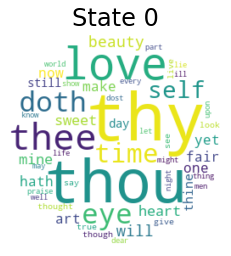

In [35]:
# one state one iteration 

hmm_one_one = unsupervised_HMM(obs_sonnet, 1, 1)
print('Sample Sonnet with 1 hidden state and 1 iteration:\n====================')
sample_sonnet(hmm_one_one, obs_map_sonnet, n_words=112)
states_to_wordclouds(hmm_one_one, obs_map_sonnet)

In [ ]:
# looping through various number of iterations with 10 states
iteration_num = [1, 5, 10, 20]

for i in iteration_num:
    hmm = unsupervised_HMM(obs_sonnet, 10, i)
    
    print('Sample Sonnet with 10 hidden states with' + str(i) + ' iterations:\n====================')
    sample_sonnet(hmm, obs_map_sonnet, n_words=112)
    states_to_wordclouds(hmm, obs_map_sonnet)

In [ ]:
# looping through various number of states with 10 iterations 

state_num = [5, 10, 20]

for i in state_num:
    hmm = unsupervised_HMM(obs_sonnet, i, 10)
    
    print('Sample Sonnet with ' + str(i) + ' hidden states with 10 iterations:\n====================')
    sample_sonnet(hmm, obs_map_sonnet, n_words=112)
    states_to_wordclouds(hmm, obs_map_sonnet)

How incorporate structure (14 lines), rhyme scheme, and iambic pentameter into HMM? 

In [ ]:
# with numbers included, 2 iterations, 10 hidden states 

# hmm10 = unsupervised_HMM(sonnets[1:], 10, 2)

In [ ]:
# sample_sonnet(hmm10, obs_map, n_words=112)

In [ ]:
# wordclouds = states_to_wordclouds(hmm10, obs_map)

In [ ]:
# alex's preprocessing 

# hmm_by_sonnet = unsupervised_HMM(obs_sonnet, 5, 1)
# sample_sonnet(hmm_by_sonnet, obs_map_sonnet, n_words=112)
# states_to_wordclouds(hmm_by_sonnet, obs_map_sonnet);

## add in additional text (combine spenser and shakespeare)

In [ ]:
# spenser_text = open(os.path.join(os.getcwd(), 'data/spenser.txt')).read()
# obs_spens, obs_map_spens = parse_observations(spenser_text)

In [ ]:
# need to combine with shakespeare 
# need to find way to split up the lines (now separated by roman numerals)

In [ ]:
# # if using roman numerals as sequences 

# spenser_shake_text = spenser_text + text

In [ ]:
# obs_both, obs_map_both = parse_observations(spenser_shake_text)

In [ ]:
# obs_spens, obs_map_spens = parse_observations(spenser_text)

In [ ]:
# obs_map_spens;

In [ ]:
# sonnets_both = turn_obs_sonnets_w_num(obs_both)

In [ ]:
# hmm_combined = unsupervised_HMM(sonnets_both, 10, 2)
# print('Sample Sonnet of combined Shakespeare and Spencer texts:\n====================')


# sample_sonnet(hmm_combined, obs_map_both, n_words=112)

In [ ]:
# wordclouds = states_to_wordclouds(hmm_combined, obs_map_both)